In [4]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Descripción de la Base de datos:
<br/>Esta es quizás la base de datos más conocida que se encuentra en el patrón literatura de reconocimiento. El papel de Fisher es un clásico en el campo y se hace referencia con frecuencia a este día.<br/> 
<br/>El conjunto de datos contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris.<br/>

- <br/>Target: Este conjunto de datos consta de 3 tipos diferentes de lirios (Setosa: 0, Versicolour: 1 y Virginica: 2) <br/>
- <br/>sepal_length: Longitud del sepalo <br/>
- <br/>sepal_width: Peso del sepalo <br/>
- <br/>peta_length: Longitud del petalo <br/>
- <!-- <br/>peta_width: Peso del petalo <br/> -->

In [31]:
# Descarga del archivo
iris = datasets.load_iris()
df_iris = pd.DataFrame(data = iris.data, columns =  ['sepal_length','sepal_width','petal_length','petal_width'] )
df_iris['Target'] = iris.target
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Medidas de tendencia central 

In [35]:
# Media
df_iris.groupby(['Target']).mean()

,sepal_length,sepal_width,petal_length,petal_width
Target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [36]:
# Mediana
df_iris.groupby(['Target']).median()

,sepal_length,sepal_width,petal_length,petal_width
Target,,,,
0,5.0,3.4,1.50,0.2
1,5.9,2.8,4.35,1.3
2,6.5,3.0,5.55,2.0


- (Setosa: 0, Versicolour: 1 y Virginica: 2)

<br/>La medidas de tendencia central nos estan ayudando a observar donde generalmente encontraremos los datos, es decir, dondé generalmente se encuentran normalmente (asumiendo que la varianza es desconocida) <br/>

<br/>Como podemos observar el peso y la longitud del petalo de los tres tipos de plantas de iris, se encuentran mejor separados por promedio y mediana con dichas variables.<br/>


### Medidas de dispersión univariable

In [39]:
# Varianza
df_iris.groupby(['Target']).var()

,sepal_length,sepal_width,petal_length,petal_width
Target,,,,
0,0.124249,0.143690,0.030159,0.011106
1,0.266433,0.098469,0.220816,0.039106
2,0.404343,0.104004,0.304588,0.075433


In [38]:
# Desviación estandar
df_iris.groupby(['Target']).std()

,sepal_length,sepal_width,petal_length,petal_width
Target,,,,
0,0.352490,0.379064,0.173664,0.105386
1,0.516171,0.313798,0.469911,0.197753
2,0.635880,0.322497,0.551895,0.274650


<br/>La medidas de dispersión univariable nos indican en promedio que tanto se dispersan los datos. Esta variable junto con la media/mediana nos daran una idea que tan disperso los datos se encuentran de las medidas centrales y tambien nos dara una idea que tan separados estan las distribuciones de acuerdo de la clasificación conocida de los tipos de iris. <br/>


### Medidas de dispersión bi-variable

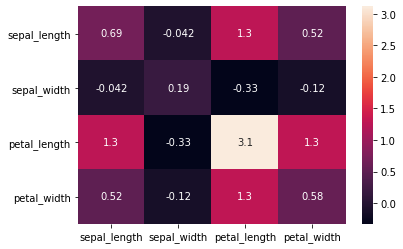

In [49]:
sns.heatmap(df_iris[['sepal_length','sepal_width','petal_length','petal_width']].cov(), annot = True)

<br/>Aunque ciertamente la matriz de covarianza carece de sentido, no es de todo cierto. Es interesante observar que dan el mismo valor 1.3 sepal_lenght, petal_length, petal_width. Es posible que no este dando indices de una posible correlación positiva entre esas variables. <br/>

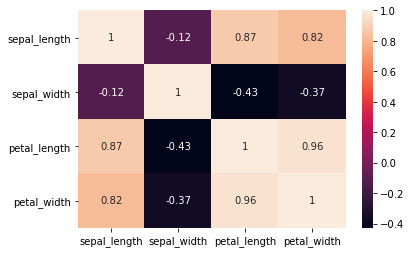

In [50]:
sns.heatmap(df_iris[['sepal_length','sepal_width','petal_length','petal_width']].corr(), annot = True)

<br/> Una vez aplicado la matriz de correlación podemos ver que efectivamente si habia correlación con las variables sepal_lenght, petal_length, petal_width. Pero no de la misma magnitud.
Tambien podemos ver que la variables de petalo, estan muy correlacionadas por lo qué puede que entre ellas no aporten mucha información si se quiere usar para una clasificación de tipos de plantas. No lo decartaria aun sin hacer más pruebas.<br/>


## Conclusión

Las medidas de tendencia central como las de dispersión por si solas pueden aportar información pero en conjunto aportan aun más información sobre la iteracción que existen estas variables con la separación de sus respectivas distribuciones 
Y medida de dispersión bivariable, aporta información de que tanto interactua entre sí y si podrian aportarnos información para una supuesta clasificación.